## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [266]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

In [267]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [268]:
trn_edu = pd.read_csv('education_survey.csv', encoding='CP949')

In [269]:
trn_edu.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [270]:
trn_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [271]:
trn_edu.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [272]:
trn_3=trn_edu[trn_edu['학교급구분코드']==3]

In [273]:
trn_3

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [274]:
trn_3=trn_3.drop(['학교급구분코드'],axis=1)

In [275]:
trn_3

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [276]:
trn=trn_3.drop(['지역구분코드','행정구역시도코드'],axis=1)

In [277]:
trn

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [278]:
trn['방과후학교참여여부'].value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [279]:
trn=pd.get_dummies(trn,columns=['방과후학교참여여부'],dtype='int64')

In [280]:
trn[['참여','미참여']]=trn[['방과후학교참여여부_1','방과후학교참여여부_2']]
trn=trn.drop(['방과후학교참여시간수','방과후학교참여여부_1','방과후학교참여여부_2'],axis=1)

In [281]:
trn

,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [282]:
trn=trn.drop(['EBS교재비'],axis=1)

2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

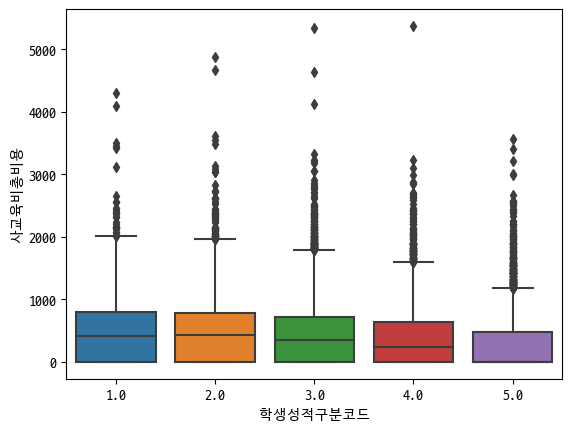

In [283]:
sns.boxplot(x=trn['학생성적구분코드'],y=trn['사교육비총비용'])

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [284]:
trn['학생성적구분코드'].value_counts()

학생성적구분코드
3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: count, dtype: int64

In [285]:
trn['학생성적구분코드']=trn['학생성적구분코드'].map({1:'상위',2:'상위',3:'중위',4:'하위',5:'하위'})

In [286]:
trn=pd.get_dummies(trn,columns=['학생성적구분코드'],dtype='int64')

In [287]:
trn

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분코드_상위,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,1,0
4922,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0,0,1
75679,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0,0,1
75680,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0,0,1
75681,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,1,0,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A:label encoding 은 단순히 숫자로 나누는것이고 onehotencoding 은 컬럼별로 나눠서 분류하는것인데, 나눠야하는 변수가 많을때 label encoding을 쓰게 되면 높은 숫자로 분류된 변수가 머신러닝을 돌릴때(실제는 명목상 숫자이지만)우위의 기준으로 쓰일수 있어서 onehotencoding 이 많은 변수에는 보통의 경우에 사용된다. 

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [288]:
trn.drop(['학생성적구분코드_하위'],axis=1,inplace=True)

In [289]:
trn

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분코드_상위,학생성적구분코드_중위
4920,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0
4921,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,1
4922,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,0
4923,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,0
4924,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0,0
75679,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0,0
75680,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0,0
75681,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,1,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:변수들의 관계가 독립적이지 않고 상관관계가 있는것인데 만약 n개의 변수에 onehotencoding 을 하게 되면 마지막 1개의 변수는 n-1 개의 변수의 값을 뺀 나머지의 값의 모임이기때문에 다중공선성이 발생한다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

<Axes: >

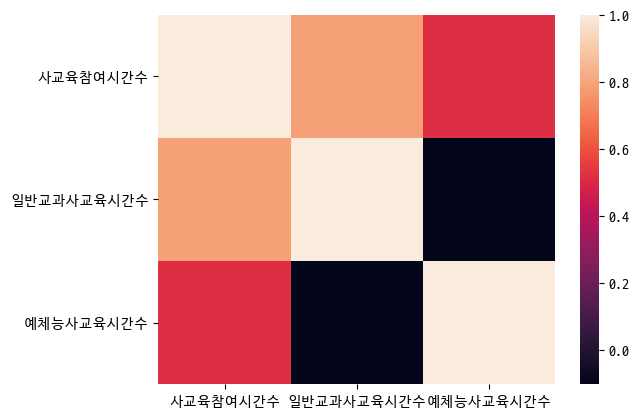

In [290]:
corr=trn[['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']].corr()
sns.heatmap(corr)

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [291]:
trn[['부_교육정도코드','모_교육정도코드','부모경제활동코드']]=trn[['부_교육정도코드','모_교육정도코드','부모경제활동코드']].fillna(0)
trn.drop(['진학희망고등학교유형코드'],axis=1,inplace=True)

In [292]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30052 entries, 4920 to 75682
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사교육참여시간수     30052 non-null  float64
 1   일반교과사교육시간수   30052 non-null  float64
 2   예체능사교육시간수    30052 non-null  float64
 3   사교육비총비용      30052 non-null  float64
 4   총자녀수         30052 non-null  int64  
 5   부_교육정도코드     30052 non-null  float64
 6   모_교육정도코드     30052 non-null  float64
 7   부모경제활동코드     30052 non-null  float64
 8   월평균가구소득코드    30052 non-null  int64  
 9   참여           30052 non-null  int64  
 10  미참여          30052 non-null  int64  
 11  학생성적구분코드_상위  30052 non-null  int64  
 12  학생성적구분코드_중위  30052 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 3.2 MB


<Axes: xlabel='사교육비총비용', ylabel='Count'>

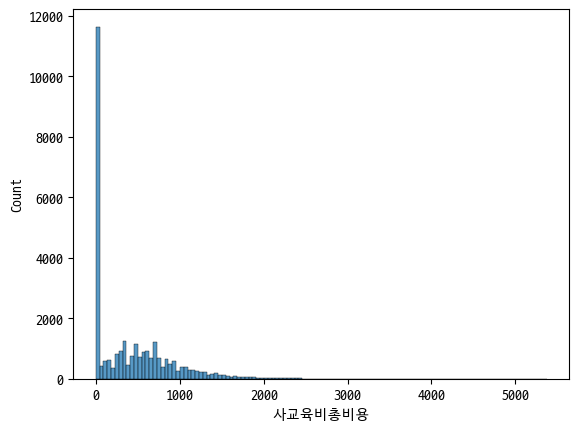

In [293]:
sns.histplot(trn['사교육비총비용'])

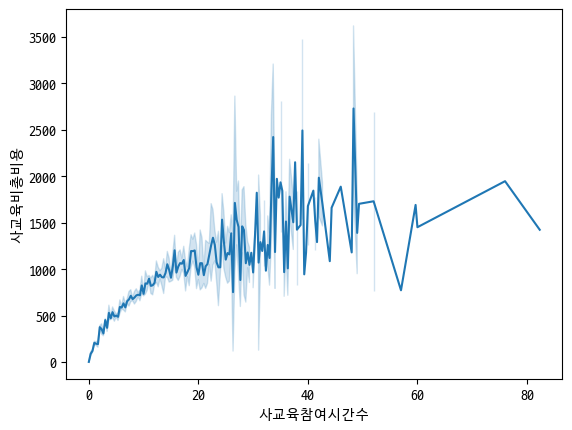

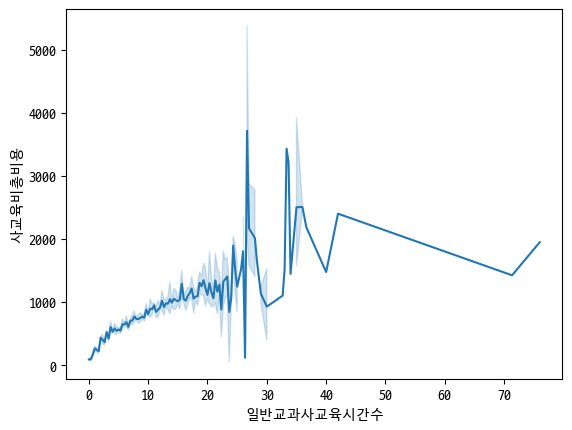

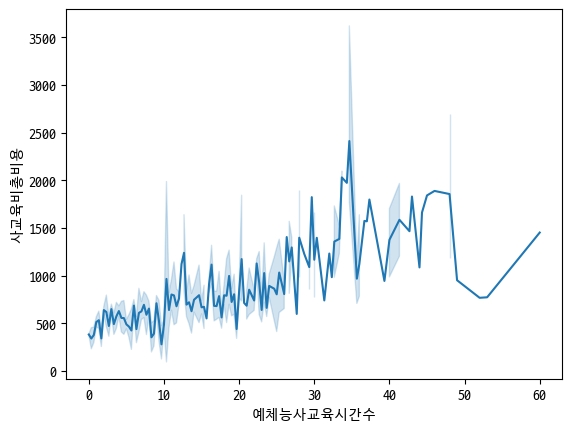

In [294]:
list_i=['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']
for i in list_i:
    sns.lineplot(x=trn[i],y=trn['사교육비총비용'])
    plt.show()

In [295]:
trn[list_i].describe()

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
count,30052.000000,30052.000000,30052.000000
mean,5.543491,4.319657,1.137717
std,6.506507,5.573777,3.884653
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,4.000000,1.666667,0.000000
75%,9.000000,8.000000,0.000000
max,82.333333,76.000000,60.000000


In [296]:
#이상값 제거
trn=trn[trn['일반교과사교육시간수']<=9+1.5*9]

In [297]:
#0인값이 대부분이기때문에 분석에 어려움이 있을거 같아 행제거
trn['예체능사교육시간수'][trn['예체능사교육시간수']==0].count()

25436

In [298]:
trn.drop(['예체능사교육시간수'],axis=1,inplace=True)
trn.drop(['사교육참여시간수'],axis=1,inplace=True)

C:\Users\yeonn\AppData\Local\Temp\ipykernel_27380\232180847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn.drop(['예체능사교육시간수'],axis=1,inplace=True)
C:\Users\yeonn\AppData\Local\Temp\ipykernel_27380\232180847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn.drop(['사교육참여시간수'],axis=1,inplace=True)


<Axes: xlabel='일반교과사교육시간수', ylabel='사교육비총비용'>

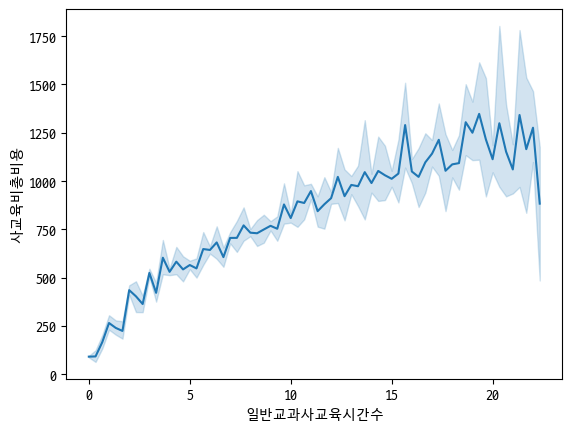

In [299]:
sns.lineplot(x=trn['일반교과사교육시간수'],y=trn['사교육비총비용'])

In [300]:
#기초,학사,석사,박사 기준으로 범위를 나눔
trn['모_교육정도코드'][trn['모_교육정도코드']<=35]=0
trn['모_교육정도코드'][(trn['모_교육정도코드']<=55) & (trn['모_교육정도코드']>35) ]=1 
trn['모_교육정도코드'][(trn['모_교육정도코드']<=65) & (trn['모_교육정도코드']>55) ]=2
trn['모_교육정도코드'][(trn['모_교육정도코드']<=75) & (trn['모_교육정도코드']>65) ]=3

trn['부_교육정도코드'][trn['부_교육정도코드']<=35]=0
trn['부_교육정도코드'][(trn['부_교육정도코드']<=55) & (trn['부_교육정도코드']>35) ]=1 
trn['부_교육정도코드'][(trn['부_교육정도코드']<=65) & (trn['부_교육정도코드']>55) ]=2
trn['부_교육정도코드'][(trn['부_교육정도코드']<=75) & (trn['부_교육정도코드']>65) ]=3
# 부모없음과 경제활동참여 안함코드를 통합
trn['부모경제활동코드'][trn['부모경제활동코드']==4]=0

C:\Users\yeonn\AppData\Local\Temp\ipykernel_27380\3643427643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn['모_교육정도코드'][trn['모_교육정도코드']<=35]=0
C:\Users\yeonn\AppData\Local\Temp\ipykernel_27380\3643427643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn['모_교육정도코드'][(trn['모_교육정도코드']<=55) & (trn['모_교육정도코드']>35) ]=1
C:\Users\yeonn\AppData\Local\Temp\ipykernel_27380\3643427643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

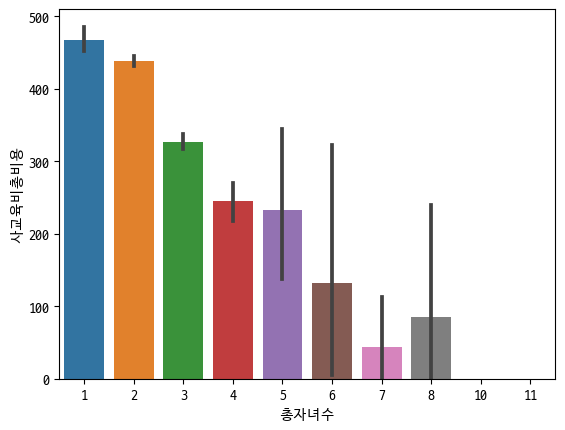

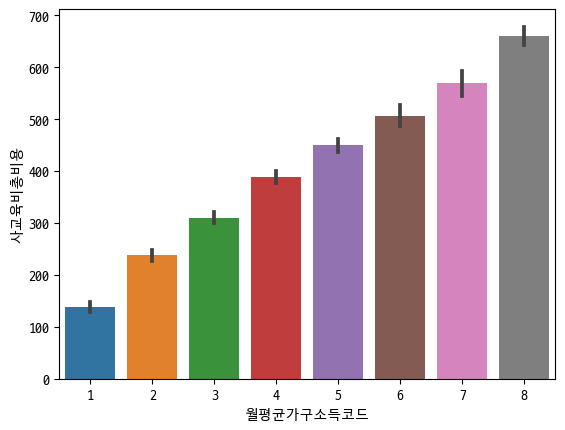

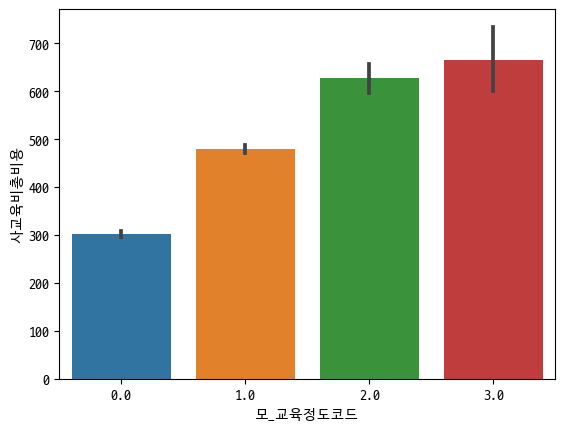

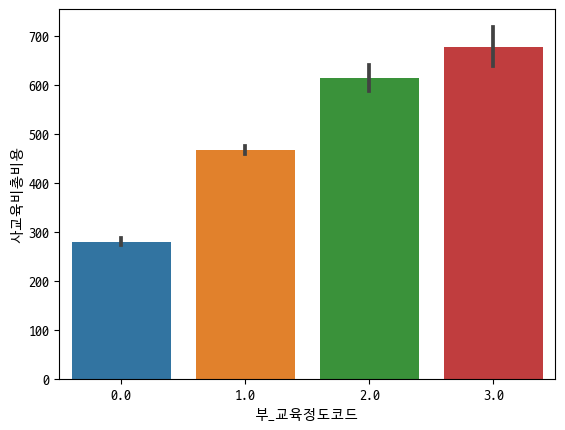

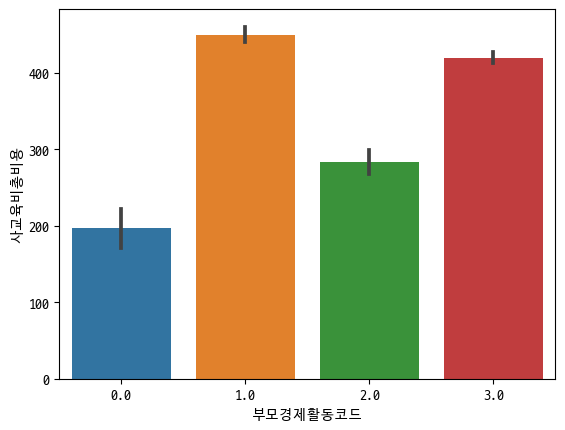

In [301]:
list_j=['총자녀수','월평균가구소득코드','모_교육정도코드','부_교육정도코드','부모경제활동코드']
for i in list_j:
    sns.barplot(x=trn[i],y=trn['사교육비총비용'])
    plt.show()

In [302]:
trn[['총자녀수','사교육비총비용']].groupby(['총자녀수']).count()

,사교육비총비용
총자녀수,
1,3521
2,19411
3,6089
4,710
5,74
6,22
7,12
8,10
10,2


In [303]:
trn

,일반교과사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,참여,미참여,학생성적구분코드_상위,학생성적구분코드_중위
4920,0.0,0.000000,1,3.0,2.0,2.0,4,1,0,1,0
4921,0.0,0.000000,2,1.0,1.0,3.0,6,1,0,0,1
4922,0.0,0.000000,2,0.0,1.0,3.0,4,1,0,0,0
4923,0.0,0.000000,2,1.0,1.0,3.0,1,1,0,0,0
4924,12.0,2203.395453,2,3.0,2.0,1.0,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
75678,0.0,0.000000,1,1.0,0.0,3.0,4,0,1,0,0
75679,0.0,0.000000,4,1.0,0.0,3.0,6,0,1,0,0
75680,0.0,105.000000,3,1.0,1.0,3.0,8,0,1,0,0
75681,0.0,112.500000,2,1.0,2.0,3.0,5,0,1,1,0


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb

In [305]:
y=trn['사교육비총비용']
trn_lr=trn.drop(['사교육비총비용'],axis=1)

In [306]:
X_train,X_test,y_train,y_test=train_test_split(trn_lr,y,test_size=0.2,random_state=42)

In [307]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predlr=lr.predict(X_test)

In [308]:
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_predrr=rr.predict(X_test)

In [313]:
ls=Lasso(0.1)
ls.fit(X_train,y_train)
y_predls=ls.predict(X_test)

In [314]:
#Lasso 회귀가 제일 mse가 낮다.
predict_list=[y_predlr,y_predrr,y_predls]
for i in predict_list:
    mse = mean_squared_error(y_test, i)
    print("Mean Squared Error:", mse)

Mean Squared Error: 104056.69560030248
Mean Squared Error: 107023.99132187614
Mean Squared Error: 104053.13211271027


In [311]:
#앙상블인 xgb모델도 사용
xgb = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb.fit(X_train,y_train)
y_predxgb=xgb.predict(X_test)

In [312]:
#Lasso 보다 낮은 mse
mse = mean_squared_error(y_test, y_predxgb)
print("Mean Squared Error:", mse)

Mean Squared Error: 98358.05497387462
